#Importing Required Libraries








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
path = "/content/drive/MyDrive/Dataset/Amazon-Products.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [ ]:
data.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,175794
no_of_ratings,175794
discount_price,61163
actual_price,17813


In [ ]:
data = data.dropna()


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,182003
no_of_ratings,182027
discount_price,61163
actual_price,17813


# Preprocessing


In [ ]:
data['ratings'] = data['ratings'].astype(str).str.extract(r'(\d+\.?\d*)')
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

data['no_of_ratings'] = data['no_of_ratings'].astype(str).str.replace(',', '', regex=True)
data['no_of_ratings'] = pd.to_numeric(data['no_of_ratings'], errors='coerce')

for col in ['discount_price', 'actual_price']:
    data[col] = data[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['discount_percentage'] = ((data['actual_price'] - data['discount_price']) / data['actual_price']) * 100



# Applying K-Means

In [ ]:
features = ['ratings', 'no_of_ratings', 'actual_price', 'discount_price', 'discount_percentage']

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(data[features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

inertias = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

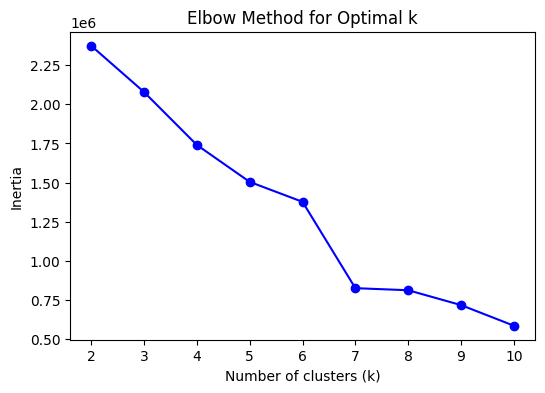

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
best_k = 6

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)


# Data Visualization

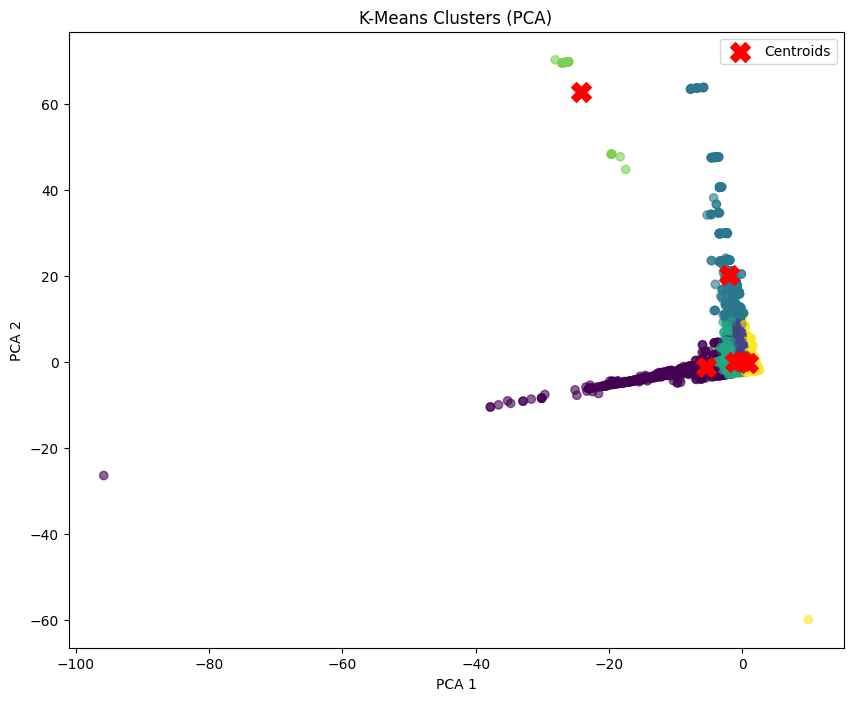

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clusters (PCA)")
plt.legend()
plt.show()

# Couldn't make roc curve because there is no binary value
